In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Loading The DatasSet

In [104]:
df=pd.read_csv("Crop Production data.csv")

In [105]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [106]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [110]:
df

,Crop_Year,Season,Crop,Area,Production
0,2000,Kharif,Arecanut,1254.0,2000.0
1,2000,Kharif,Other Kharif pulses,2.0,1.0
2,2000,Kharif,Rice,102.0,321.0
3,2000,Whole Year,Banana,176.0,641.0
4,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,2014,Summer,Rice,306.0,801.0
246087,2014,Summer,Sesamum,627.0,463.0
246088,2014,Whole Year,Sugarcane,324.0,16250.0
246089,2014,Winter,Rice,279151.0,597899.0


### Data Cleaning

In [109]:
df=df.drop(["State_Name","District_Name"],axis=1)

In [111]:
df.dropna(inplace=True)

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.isnull().sum()

Crop_Year     0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [114]:
df.dtypes

Crop_Year       int64
Season         object
Crop           object
Area          float64
Production    float64
dtype: object

In [115]:
df

,Crop_Year,Season,Crop,Area,Production
0,2000,Kharif,Arecanut,1254.0,2000.0
1,2000,Kharif,Other Kharif pulses,2.0,1.0
2,2000,Kharif,Rice,102.0,321.0
3,2000,Whole Year,Banana,176.0,641.0
4,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,2014,Summer,Rice,306.0,801.0
246087,2014,Summer,Sesamum,627.0,463.0
246088,2014,Whole Year,Sugarcane,324.0,16250.0
246089,2014,Winter,Rice,279151.0,597899.0


### Feature Engineering

In [116]:
df["production_per_unit_area"] = df["Production"] / df["Area"]

In [117]:
season_encoded = pd.get_dummies(df["Season"])
df = pd.concat([df, season_encoded], axis=1)

In [139]:
Crop_encoded = pd.get_dummies(df["Crop"])
df = pd.concat([df, Crop_encoded], axis=1)

In [143]:
df=df.drop(["Crop"],axis=1)

In [142]:
df=df.drop(["Season"],axis=1)

KeyError: "['Season'] not found in axis"

In [144]:
df

,Crop_Year,Area,Production,production_per_unit_area,Autumn,Kharif,Rabi,Summer,Whole Year,Winter,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
0,2000,1254.0,2000.0,1.594896,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0.500000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,3.147059,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,3.642045,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0.229167,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,2.617647,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,2014,627.0,463.0,0.738437,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,2014,324.0,16250.0,50.154321,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
246089,2014,279151.0,597899.0,2.141848,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Spliting the data

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("production_per_unit_area", axis=1), df["production_per_unit_area"], test_size=0.2, random_state=42)

In [146]:
X_train

,Crop_Year,Area,Production,Autumn,Kharif,Rabi,Summer,Whole Year,Winter,Apple,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
57741,2006,1900.0,600.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152958,2010,2.0,0.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151403,1998,1495.0,2543.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138978,1999,100.0,60.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
192292,2009,920.0,675.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125211,1998,302400.0,243900.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108161,2008,6144.0,4238.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138868,2002,99.0,396.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154305,2013,107.0,17.3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
y_train

57741     0.315789
152958    0.400000
151403    1.701003
138978    0.600000
192292    0.733696
            ...   
125211    0.806548
108161    0.689779
138868    4.000000
154305    0.161682
127402    0.405405
Name: production_per_unit_area, Length: 185951, dtype: float64

### Train the model

In [148]:
model=LinearRegression()

In [149]:
model.fit(X_train,y_train)

LinearRegression()

In [152]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 369732.3991239548


In [153]:
coefs = pd.Series(model.coef_, index=X_train.columns)
print("Coefficients:")
print(coefs.sort_values(ascending=False))

Coefficients:
Coconut         3360.260573
Sugarcane        164.040360
Whole Year        22.551529
Crop_Year          2.279392
Rabi               2.102268
                   ...     
Lentil           -42.957747
Cardamom         -44.421951
Black pepper     -45.052376
Drum Stick       -45.053802
Cashewnut        -45.373554
Length: 133, dtype: float64


### Visualization

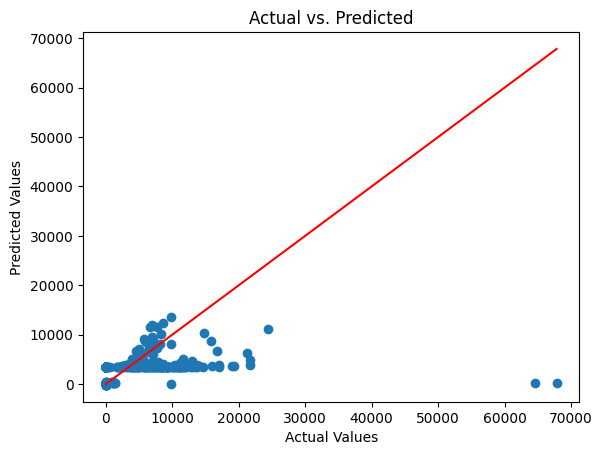

In [155]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()